In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sea
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
print("I'm ready to go")

I'm ready to go


In [154]:
df=pd.read_csv("/Users/pm3796gb/Desktop/Nova Cloud A.I/IVORY_COAST_Temperature(1991_2016).csv")
df.head(10)

,Temperature - (Celsius),Year,Month
0,26.5355,1991,Jan
1,28.1840,1991,Feb
2,28.3526,1991,Mar
3,27.8694,1991,Apr
4,27.0007,1991,May
5,26.4917,1991,Jun
6,25.2528,1991,Jul
7,24.7612,1991,Aug
8,25.4740,1991,Sep
9,25.3860,1991,Oct


In [155]:
df1=df.groupby('Year').mean()
df1=df1.reset_index()
df1.head(10)

,Year,Temperature - (Celsius)
0,1991,26.423808
1,1992,26.265917
2,1993,26.403667
3,1994,26.347917
4,1995,26.597033
5,1996,26.564542
6,1997,26.606042
7,1998,27.153958
8,1999,26.494608
9,2000,26.512033


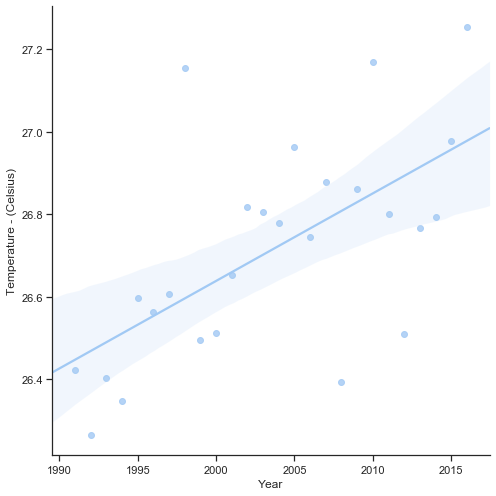

In [172]:
sea.lmplot(x='Year',y='Temperature - (Celsius)', data=df1,height=7)

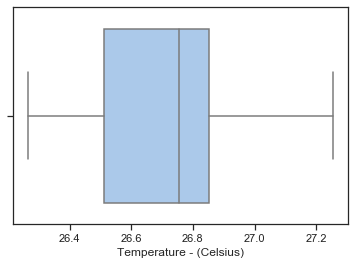

In [179]:
#sea.set(style="ticks", palette="pastel")
sea.boxplot('Temperature - (Celsius)',data=df1)
#sea.despine(offset=15, trim=True)

In [158]:
df1[df1['Temperature - (Celsius)']<26.4]

,Year,Temperature - (Celsius)
1,1992,26.265917
3,1994,26.347917
17,2008,26.393108


In [159]:
X=df1["Year"].values.reshape(-1,1)
y=df1['Temperature - (Celsius)'].values.reshape(-1,1)

In [160]:
# we need to remove outliers 
df1.describe()

,Year,Temperature - (Celsius)
count,26.000000,26.000000
mean,2003.500000,26.712940
std,7.648529,0.261730
min,1991.000000,26.265917
25%,1997.250000,26.511171
50%,2003.500000,26.756050
75%,2009.750000,26.850921
max,2016.000000,27.254042


In [161]:
model= LinearRegression()

In [162]:
model=model.fit(X,y)

In [163]:
#Metrics
print("Rsquare:" ,model.score(X,y))
print("Intercept:" ,model.intercept_)
print("slope:" ,model.coef_)

Rsquare: 0.3836861653510705
Intercept: [-15.75425022]
slope: [[0.0211965]]


#Interpretation:
#The coeficient of determination is 0.38, thefore we can say that 
# the interpretation of the intercept in our study is not meaningful
# In Ivory Coast a one year increase is associate with an increasce of 0.02 degree celsius of the average temperature on average.  the 

In [173]:
pre=[2017,2018,2019,2020,2021,2022,2023,2024,2025]
pre=np.array(pre).reshape(-1,1)

In [174]:
futur=pd.DataFrame(zip(pre,model.predict(pre)),columns=["Years","Temperature"])
futur

,Years,Temperature
0,[2017],[26.99909315384615]
1,[2018],[27.02028965527065]
2,[2019],[27.041486156695154]
3,[2020],[27.062682658119652]
4,[2021],[27.083879159544157]
5,[2022],[27.105075660968655]
6,[2023],[27.12627216239316]
7,[2024],[27.14746866381766]
8,[2025],[27.168665165242164]


In [169]:
futur=futur.Temperature.astype(float)

In [171]:
futur.describe()

count     9.000000
mean     27.083879
std       0.058049
min      26.999093
25%      27.041486
50%      27.083879
75%      27.126272
max      27.168665
Name: Temperature, dtype: float64